# Spatial Operations 空域运算
## 点运算

![](images/PointOperations.png)

## 邻域运算
![](images/NeighborhoodOperations.png)

# 1. 对比度拉伸
Contrast Stretching
## 原理

对比度拉伸，也被称为对比度拉伸增强或对比度扩展，是一种图像增强技术，其目的是提高图像的对比度。这种技术通常在图像的对比度较低时使用，例如在雾天拍摄的图片或在某些医学成像应用中。

主要作用：将原始图像的灰度级从一个较小的范围扩展到更广的范围。

![](images/ContrastThreshold.png)


例如：一个图像的像素值主要集中在100到150之间，说明图像可能比较暗淡和对比度低。对比度拉伸可以将这些值重新映射，使得它们覆盖更大的范围（0～255），从而使图像看起来更明亮，对比度更高。


实现步骤：
1. 设定图像中的最低灰度值（$L$）和最高灰度值（$H$）。
2. 对图像中的每个像素值 $f(x,y)$ 应用以下线性变换：

$$
f'(x,y)=\frac{f(x,y)-L}{H-L}\times 25
$$

其中 $f'(x,y)$ 是调整后的像素值，灰度值范围就会从 $L\sim H$ 变成 $0\sim255$。
（低于 $L$ 映射为 $0$，高于 $H$ 映射为 $255$）


它源于数据归一化，将数据调整到 [0,1] 范围内

$$
\frac{x-x_{min}}{x_{max}-x_{min}}
$$

## 拓展

### 将灰度映射至任意范围
- 设像素值范围为 [a, b]，我们想将其拉伸到 [c, d]，则对比度拉伸可以表示为：

$$
s = \frac{(d-c)(r-a)}{b-a} + c
$$

其中：
- r 是原始图像的像素值。
- s 是拉伸后的像素值。
- a 是原始图像的最小像素值。
- b 是原始图像的最大像素值。
- c 和 d 是拉伸后的像素值范围。

### 分段对比度拉伸

![](images/分段对比度拉伸.png)


## 实现

使用OpenCV，对比度拉伸可以简单地使用`cv2.normalize()`函数实现

它用于将数组或图像数据规范化到指定的范围。它可以根据指定的范围和规范化类型来进行线性规范化或其他类型的规范化。

函数的一般形式如下：
```python
cv2.normalize(src, dst, alpha, beta, norm_type, dtype, mask)
```

参数解释：
- **src**：输入数组或图像。
- **dst**：输出数组，通常为`None`，输出结果会返回。
- **alpha**：规范化范围的下界。
- **beta**：规范化范围的上界。
- **norm_type**：规范化类型，如 `cv2.NORM_MINMAX`（线性规范化到 [alpha, beta] 范围）、`cv2.NORM_INF`、`cv2.NORM_L1`、`cv2.NORM_L2` 等。
- **dtype**：输出数组的类型。通常设置为`-1`，表示与输入数组相同。
- **mask**：操作掩码。它指定了哪些元素被考虑进行规范化。通常为`None`，表示处理整个图像。

`cv2.normalize` 可以对 RGB 图片进行操作。当你传入一个彩色图像时，每个通道独立地进行规范化。这意味着红、绿和蓝三个通道分别被规范化，然后组合回一个彩色图像。

这段代码对 RGB 图像的每个通道独立进行规范化。在某些应用中，这可能会导致颜色变化。如果需要保持原始的颜色关系，可能需要将图像转换到其他颜色空间（如HSV），然后只对特定的通道（例如亮度）进行规范化。


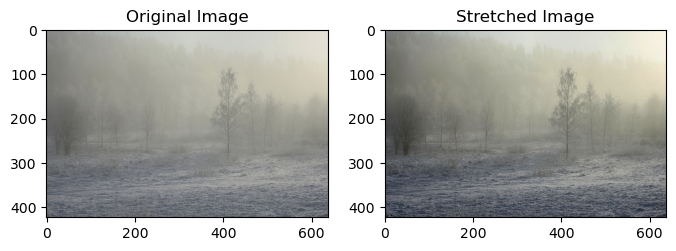

In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 读取图像
original_image = cv2.cvtColor(cv2.imread('images/Landscape4ContrastStretching.png'), cv2.COLOR_BGR2RGB)

# 对比度拉伸
stretched_image = cv2.normalize(original_image, None, 0, 255, cv2.NORM_MINMAX)

# 显示原始和拉伸后的图像
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray');
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(stretched_image, cmap='gray');
plt.title('Stretched Image')
plt.show()

这种方法同样可以应用于彩色图像的每个通道，但请注意，直接对RGB图像的每个通道进行操作可能会导致颜色失真。在某些情况下，可能更适合先将图像转换到其他颜色空间（如HSV或LAB）并仅拉伸亮度或亮度通道。

当图片的灰度最小值不等于 0 时，或者灰度最大值不等于 255，需要做对比度拉伸。
解决图像灰度范围不够广，图像的动态范围。通常是图像处理最后一步。

## 根据公式手动实现

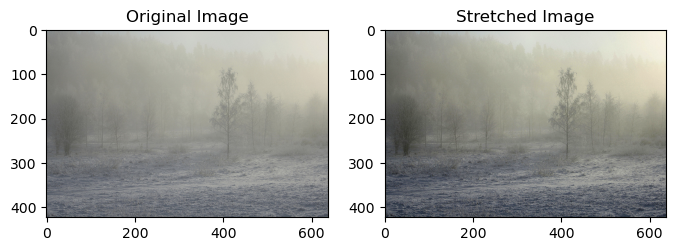

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 读取图像
original_image = cv2.cvtColor(cv2.imread('images/Landscape4ContrastStretching.png'), cv2.COLOR_BGR2RGB)


def contrast_stretching(original_image, max_out=255):
    min_val = np.min(original_image)
    max_val = np.max(original_image)
    stretched_image = (original_image - min_val) / (max_val - min_val) * max_out
    return stretched_image.astype(np.uint8)


# 对比度拉伸
stretched_image = contrast_stretching(original_image, 255)

# 显示原始和拉伸后的图像
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(stretched_image, cmap='gray')
plt.title('Stretched Image')
plt.show()

Tips：对比度拉伸灰度图可能会看不清。